<a href="https://colab.research.google.com/github/aghababaei-alireza/AI_Darsman/blob/main/Semester%206%20-%20Deep%20Learning/Learn/Part4-ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span dir="rtl" style="font-family:B Nazanin" align="right">
    <h1>فصل ششم: یادگیری عمیق</h1>
    <h2>بخش چهارم: شبکه‌های عصبی کانولوشن یا Convolutional neural network یا CNN</h2>
</span>

<p style="font-family:B Nazanin" dir="rtl">
    در این بخش یکی از مهم‌ترین انواع شبکه‌های عصبی یعنی شبکه‌های عصبی کانولوشن (CNN) را بررسی می‌کنیم. اما قبل از آن تعدادی از مفاهیمی که در این بخش به آن نیاز داریم را یاد می‌گیریم.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>محو گرادیان یا Vanishing Gradient:</b><br>
    محو گرادیان یکی از مشکلاتی است که ممکن است در همه مدل‌های شبکه عصبی اتفاق بیفتد و به حالتی می‌گویند که در مقادیر گرادیان‌ها در طول فرایند یادگیری به تدریج کم می‌شود و به صفر میل می‌کند. این اتفاق معمولا در اثر استفاده از توابع فعال‌سازی مانند Sigmoid یا Tanh در لایه‌های اولیه ممکن است به وجود آید که در اثر آن به‌روزشدن وزن‌ها در لایه‌های ابتدایی در فرایند BackPropagation یا اتفاق نمی‌افتد یا خیلی دیر اتفاق می‌افتد و زمانی که وزن‌ها به‌روز نشوند، فرایند یادگیری انجام نمی‌شود.
</p>

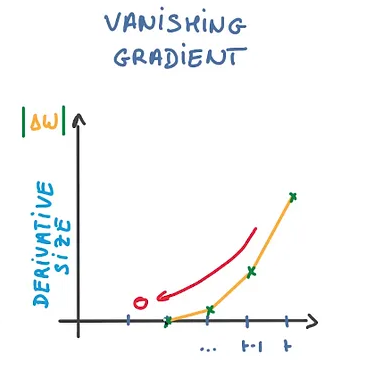

<p style="font-family:B Nazanin" dir="rtl">
    <b>انفجار گرادیان یا Exploding Gradient:</b><br>
    انفجار گرادیان زمانی اتفاق می‌افتد که مقادیر گرادیان‌ها در طول فرایند یادگیری بیش از حد زیاد می‌شود. این اتفاق در شبکه‌های خیلی عمیق، مثلا شبکه‌های RNN که توالی‌های طولانی رخ می‌دهد، به وجود می‌آید. در این حالت که گرادیان بیش از حد بزرگ می‌شود، مقادیر وزن‌ها نیز خیلی زیاد می‌شود و اگر وزن‌ها خیلی زیاد شوند، می‌گوییم مدل ناپایدار می‌شود.
</p>

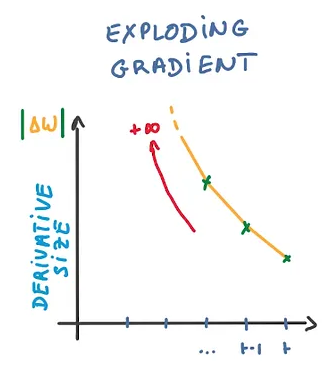

<p style="font-family:B Nazanin" dir="rtl">
    <b>روش‌های مقابله با محو گرادیان:</b><br>
    ** استفاده از توابع فعال‌ساز مناسب مانند ReLU و PReLU و LReLU: همان طور که گفتیم یکی از عوامل ایجاد محو گرادیان استفاده از توابع فعال‌سازی مانند Sigmoid یا Tanh است. پس استفاده از توابع فعال‌ساز از خانواده ReLU می‌تواند این مشکل را حل کند. <br>
    ** استفاده از Skip Connections یا Shortcut Connections: یک تکنیک است که در شبکه‌های عصبی عمیق یک مسیر مستقیم بین ورودی و خروجی دو یا چند لایه ایجاد می‌کند. مثلا خروجی یک لایه با خروجی چند لایه بعدتر از خود مستقیما جمع شود و لایه‌های مابین این دو لایه در نظر گرفته نشود. در این صورت گرادیان‌ها می‌توانند از طریق مسیر مستقیم و بدون کاهش به لایه‌های ابتدایی برگردند و کاهش گرادیان کمتر اتفاق می‌افتد. بنابراین وقتی مسیر مستقیم ایجاد می‌شود، شبکه می‌تواند تغییرات کوچک‌تر و ظریف‌تر را بهتر یاد بگیرد. این تکنیک در شبکه‌های پیشرفته‌تر مانند ResNet و ... در ادامه بیشتر توضیح داده خواهد شد.<br>
    ** طراحی معماری‌های مناسب‌تر برای شبکه‌های عصبی مانند Transformer و LSTM و ResNet<br>
    ** استفاده از نرمال‌سازی دسته‌ای یا Batch Normalization: در ادامه مفصل توضیح داده خواهد شد.<br>
    ** مقداردهی اولیه وزن‌ها با روش‌هایی مثل Xavier Initialization یا He Initialization: در ادامه مفصل توضیح داده خواهد شد.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>نرمال‌سازی دسته‌ای یا Batch Normalization:</b><br>
    همان طور که می‌دانید در همه مسائل یادگیری از یادگیری ماشین تا یادگیری عمیق، همیشه از تکنیک‌های نرمال‌سازی داده‌های ورودی بهره می‌بریم تا فرایند یادگیری بهتر اتفاق بیفتد. اما نرمال‌سازی دسته‌ای فرایندی است که در یک تکنیک در یادگیری عمیق است که در هر لایه پیش از اعمال تابع فعال‌ساز، عمل نرمال‌سازی داده‌ها انجام می‌شود. این فرایند با نرمال‌سازی داده‌های ورودی متفاوت است. در حقیقت در هر لایه قبل از اینکه تابع فعال‌ساز رویی داده‌های آن لایه عملی انجام دهد، این داده‌ها نرمال می‌شوند. نرمال‌سازی نیز به این صورت انجام می‌شود که میانگین و انحراف معیار داده‌ها محاسبه می‌شود و داده‌ها طوری تغییر می‌کنند که میانگین آن‌ها صفر و انحراف معیار آن‌ها یک شود. این عمل باعث می‌شود تا داده‌ها در بازه مناسبی قرار بگیرند و تابع فعال‌ساز عملکرد بهتری روی این داده‌ها خواهد داشت. در نتیجه مشتق تابع فعال‌ساز روی این داده‌ها بزرگ‌تر می‌شود و یادگیری در لایه‌های ابتدایی شبکه نیز امکان‌پذیر می‌شود و عملا مشکل محو گرادیان از بین می‌رود. از طرف دیگر این کار از رشد بیش از حد گرادیان نیز می‌تواند جلوگیری کند و یکی از روش‌های مقابله با انفجار گرادیان نیز هست.
</p>

$$
\hat{x_i} = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
$$

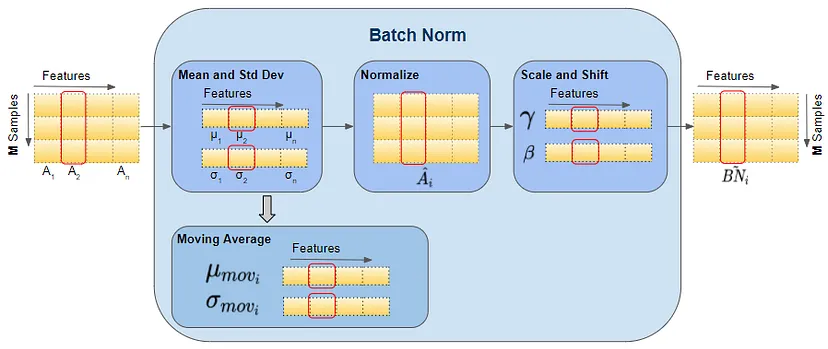

<p style="font-family:B Nazanin" dir="rtl">
    <b>مقداردهی اولیه وزن‌ها یا Weight Initializing:</b><br>
    تاکنون در همه مثال‌هایی که از شبکه‌های عصبی دیدیم، مقادیر اولیه‌ای که برای وزن‌ها در نظر می‌گرفتیم، به صورت کاملا تصادفی و در یک بازه کاملا نامحدود بود و در هر مرحله از یادگیری با به‌روز شدن وزن‌ها به مقادیر منطقی‌تری می‌رسیدیم. بنابراین انتخاب مقادیر تصادفی در مرحله اول خود می‌تواند روند تغییرات گرادیان‌ها را به سمتی ببرد که محو گرادیان یا حتی انفجار گرادیان اتفاق بیفتد. حال اگر به روشی بتوانیم وزن‌های اولیه را بهینه‌تر انتخاب کنیم، از مشکلاتی مانند محو یا انفجار گرادیان جلوگیری خواهیم کرد. در ادامه دو روشی که برای مقداردهی اولیه وزن‌ها پیشنهاد شده است را بررسی می‌کنیم:
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>Xavier Initializing Weight:</b><br>
    در سال 2010 روشی برای بهبود همگرایی شبکه ابداع شد. برای این کار گفته شد که باید واریانس سیگنال‌هایی که از یک لایه به لایه دیگر متقل می‌شود، ثابت باشد. این واریانس ثابت کمک می‌کند که مقدار گرادیان در لایه‌های مختلف نه خیلی کوچک باشد و نه خیلی بزرگ. این روش با نام Xavier معرفی شد. در این روش مقادیر اولیه وزن‌ها همچنان به صورت تصادفی ولی از یک توزیع نرمال یا توزیع یکنواخت در یک بازه مشخص انتخاب می‌شوند. <br>
    همان طور که در روابط زیر مشخص است بر اساس تعداد ورودی‌ها و خروجی‌های هر نورون مقادیر وزن محاسبه می‌شود. در روابط زیر $n_{in}$ تعداد ورودی‌های هر نورون در همان لایه و $n_{out}$ تعداد خروجی‌های تولیدشده توسط نورون در همان لایه است.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;* توزیع نرمال Xavier یا Xavier Normal Distribution:
</p>

$$
W \sim N\left(0, \frac{1}{n_{in} + n_{out}}\right)
$$

<p style="font-family:B Nazanin" dir="rtl">
    &nbsp;&nbsp;&nbsp;&nbsp;* توزیع یکنواخت Xavier یا Xavier Uniform Distribution:
</p>

$$
W \sim U\left(-\sqrt{\frac{6}{n_{in} + n_{out}}}, +\sqrt{\frac{6}{n_{in} + n_{out}}}\right)
$$

<p style="font-family:B Nazanin" dir="rtl">
    بنابراین بر اساس اینکه می‌خواهیم از توزیع نرمال یا یکنواخت استفاده کنیم، مقادیر وزن‌ها را در این بازه‌ها انتخاب می‌کنیم. این روش برای اکثر توابع فعال‌سازی که متقارن هستند، کاربرد دارد مانند Sigmoid و Tanh ولی برای توابع فعال‌ساز نامتقارن مانند خانواده ReLU همیشه خوب کار نمی‌کند.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>He Initializing Weights:</b><br>
    در سال 2015 روش دیگری معرفی شد که برای توابع فعال‌ساز نامتقارن مانند خانواده ReLU وضعیت بهتری دارند. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;* توزیع نرمال He یا He Normal Distribution:
</p>

$$
W \sim N\left(0, \sqrt{\frac{2}{n_{in}}}\right)
$$

<p style="font-family:B Nazanin" dir="rtl">
    &nbsp;&nbsp;&nbsp;&nbsp;* توزیع یکنواخت He یا He Uniform Distribution:
</p>

$$
W \sim U\left(-\sqrt{\frac{6}{n_{in}}}, +\sqrt{\frac{6}{n_{in}}}\right)
$$

<p style="font-family:B Nazanin" dir="rtl">
    نکته بسیار مهمی که وجود دارد این است که از هر کدام از این دو روش Xavier یا He اگر استفاده کردیم، بهتر است که مقادیر بایاس را صفر در نظر بگیریم.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>روش‌های مقابله با انفجار گرادیان:</b><br>
    ** محدود کردن مقدار گرادیان‌ها یا Gradient Clipping: یک مقدار حداکثری برای گرادیان در نظر می‌گیریم و می‌گوییم اگر مقدار گرادیان بیش از آن شد مورد قبول نیست و مقدار گرادیان نمی‌تواند بیشتر از آن مقدار حداکثری باشد. <br>
    ** کاهش نرخ یادگیری یا Learning Rate: وقتی نرخ یادگیری زیاد باشد، حتی گرادیان‌های کوچک نیز می‌توانند باعث تغییرات زیاد در وزن‌ها شوند. پس با کاهش نرخ یادگیری باعث می‌شویم که وزن‌ها با تغییرات کمتری به‌روز شوند و از انفجار گرادیان جلوگیری می‌شود. <br>
    ** استفاده از بهینه‌سازهای پایدار مانند Adam و RMSProp که نرخ یادگیری را به صورت مجزا برای هر پارامتر تطبیق می‌دهند و میزان تغییرات وزن‌ها را کنترل می‌کنند. <br>
    ** طراحی شبکه با تعداد لایه‌های مناسب و عمق کنترل‌شده: معمولا شبکه‌هایی که عمق زیادی دارند، مستعد انفجار گرادیان هستند. یعنی از یک لایه به لایه دیگر گرادیان‌ها مرتبا با یکدیگر جمع و ضرب می‌شوند. بنابراین هر چه عمق یک شبکه بیشتر شود، هم احتمال محو گرادیان در لایه‌های اولیه وجود دارد و هم احتمال انفجار گرادیان. <br>
    ** استفاده از نرمال‌سازی دسته‌ای یا Batch Normalization. <br>
    ** مقداردهی اولیه وزن‌ها با استفاده از روش‌هایی مانند Xavier Initializion یا He Initialization.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>شبکه‌های عصبی کانولوشن یا CNN:</b><br>
    شبکه‌های عصبی کانولوشن یا Convolutional Neural Network (CNN) یک مدل از شبکه‌های یادگیری عمیق هستند که به صورت خاص برای شناسایی و کشف ویژگی‌ها استفاده می‌شوند. در واقع این شبکه‌ها با استفاده از ویژگی‌های کانولوشنی ویژگی‌های داده‌ها را کشف می‌کنند و این ویژگی‌ها را در لایه‌های بعدی پردازش می‌کند تا بتواند در نهایت یک سری کارها مانند دسته‌بندی، پیش‌بینی و حتی شبیه‌سازی را انجام دهد. <br>
    شبکه‌های CNN می‌توانند با انواع داده‌های تصویری، ویدئویی، صوتی و حتی متنی کار کنند. بیشترین کاربرد این شبکه‌ها در شناسایی الگوهای تصویری و فضایی است. مثلا در داده‌های تصویری، ویژگی‌هایی مانند لبه‌ها، رنگ‌ها و بافت تصویر را می‌تواند کشف کند. در داده‌های صوتی ویژگی‌هایی مانند شدت صدا، تغییرات فرکانسی و تغییرات الگوی صدا در طول زمان را می‌تواند کشف کند. در داده‌های متنی ویژگی‌هایی مانند الگوهای معنایی، الگوهای نحوی و ساختارهای زبانی را می‌تواند کشف کند. <br>
    تاریخچه: در دهه 1980 برای اولین بار از شبکه CNN برای کار روی دیتاست MNIST (تشخیص ارقام از روی تصاویر دست‌نویس) استفاده شد. در سال 2012 شبکه‌های CNN به صورت عمومی معرفی شد و در موارد مختلف از آن استفاده شد. در این سال یک تست جدی روی دیتاست ImageNet انجام شد. این دیتاست، مجموعه‌ای از میلیون‌ها تصویر با هزاران کلاس مختلف است که به صورت مداوم به‌روز می‌شود.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>تفاوت شبکه‌های عصبی مصنوعی (ANN) با شبکه‌های عصبی کانولوشنی (CNN):</b><br>
    تا پیش از این، شبکه‌های عصبی مصنوعی یا ANN را بررسی کرده‌ایم. این شبکه‌ها به صورت لایه‌هایی از نورون‌های مختلف هستند که هر نورون در هر لایه به تمام نورون‌ها در لایه قبل و بعد از خود متصل است. به عبارت دیگر می‌گوییم این شبکه، یک شبکه کاملا متصل یا Fully Connected است. <br>
    اما در شبکه‌های CNN از لایه‌های کانولوشنی استفاده می‌شود که در این لایه‌ها هر Node به طور محلی به ناحیه‌ای از ورودی متصل می‌شود. (در ادامه به طور کامل توضیح داده می‌شود.) پس ساختار شبکه‌های CNN کاملا متصل نیست و هر Node فقط به یک ناحیه از ورودی متصل می‌شود. <br>
    از طرف دیگر اگر بخواهیم از لحاظ نوع داده‌های ورودی مقایسه کنیم، شبکه‌های ANN برای پردازش داده‌های ساختاریافته مناسب هستند مانند داده‌های جدولی. اما CNNها برای پردازش داده‌های تصویری و ویدئویی بسیار کاربرد دارند. <br>
    از لحاظ عملکرد و هدف می‌توان گفت هدف اصلی شبکه‌های ANN شبیه‌سازی ساده‌تری از مغز انسان است که در آن اتصالات به صورت کلی و بدون هیچگونه خاصیت مکانی انجام می‌شود. در صورتی که هدف اصلی شبکه‌های CNN شناسایی ویژگی‌های مکانی در داده‌های تصویری است. <br>
    از لحاظ کارایی، شبکه‌های ANN به خاطر ساختار ساده‌تری که دارند، در مسائل پیچیده‌تر که باید ویژگی‌های پیچیده‌تری شناسایی شوند، عملکرد ضعیف‌تری نسبت به شبکه‌های CNN دارند.
</p>

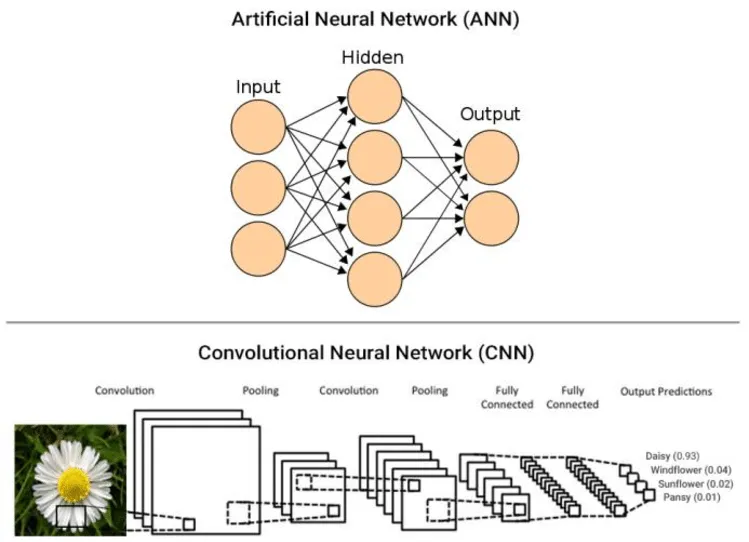

<p style="font-family:B Nazanin" dir="rtl">
    <b>شبکه‌های CNN و پردازش تصویر و ویدئو:</b><br>
    از شبکه‌های CNN برای شناسایی و تحلیل ویژگی‌های مختلف در تصاویر و ویدئوهای مختلف استفاده می‌شود. مثلا CNN می‌تواند لبه‌ها، بافت‌ها، رنگ‌ها و حتی اجسام مختلف در یک تصویر را شناسایی کند. در ویدئوها نیز می‌تواند همین موارد را شناسایی کند. البته چون در ویدئوها، داده‌ها به صورت متوالی هستند، می‌تواند تغییرات زمانی و تغییرات موجود در فریم‌های مختلف را نیز تحلیل کند. <br>
    مغز ما وقتی یک تصویر را می‌بیند، در ابتدا ویژگی‌هایی مانند لبه‌ها و ... را تشخیص می‌دهد. همین اتفاق در لایه‌های اولیه شبکه‌های CNN نیز انجام می‌شود و در لایه‌های بعدی، ویژگی‌های پیچیده‌تر مانند شناسایی چهره، شناسایی اشیاء و ... اتفاق می‌افتد.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>ساختار اصلی شبکه‌های CNN:</b><br>
    هر شبکه عصبی CNN از پنج لایه اصلی تشکیل می‌شود:<br>
    1- لایه کانولوشنی (Convolutional Layer)<br>
    2- لایه پولینگ (Pooling Layer)<br>
    3- توابع فعال‌ساز (Activation Functions)<br>
    4- لایه کاملا متصل (Fully Connected Layer)<br>
    5- لایه نرمال‌سازی دسته‌ای (Batch Normalization Layer)
</p>

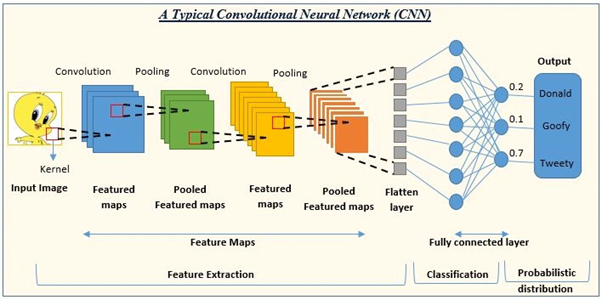

<p style="font-family:B Nazanin" dir="rtl">
    <b>لایه کانولوشنی (Convolutional Layer):</b><br>
    اولین لایه هر شبکه CNN، لایه کانولوشنی است که قطعا یکی از مهم‌ترین لایه‌های هر شبکه است. در این لایه یک سری فیلترها (که به آن کرنل Kernel گفته می‌شود) به تصویر اعمال می‌شود تا به کمک آن‌ها یک سری ویژگی‌ها کشف شود. پس از این لایه که در جاهای مختلفی از شبکه CNN استفاده می‌شود، برای کشف ویژگی‌ها بهره برده می‌شود. برای فهم بهتر از نحوه عملکرد این نوع لایه‌ها، مفهوم کانولوشن (Convolution) را در ادامه توضیح خواهیم داد.
</p>

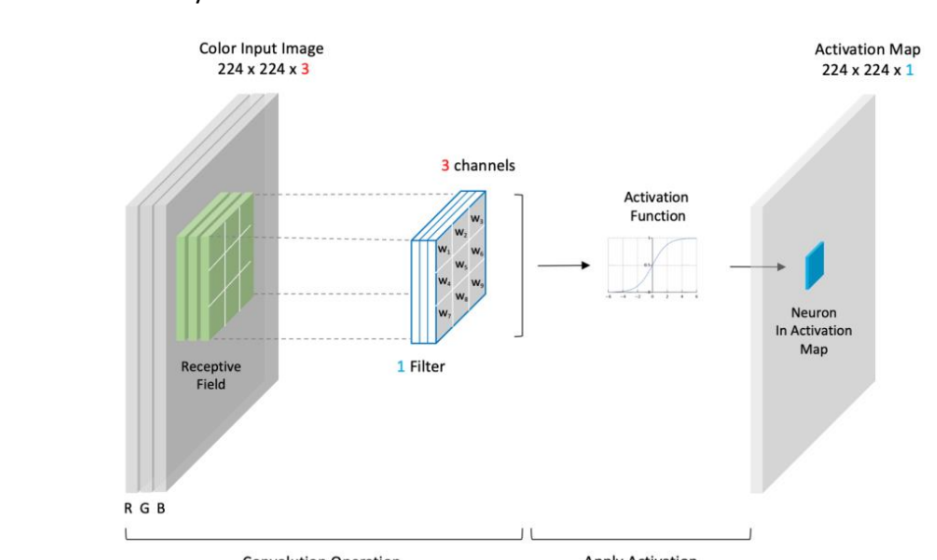

<p style="font-family:B Nazanin" dir="rtl">
    <b>کانولوشن (Convolution):</b><br>
    کانولوشن فرایندی است که داده‌های ورودی را از یک کرنل یا فیلتر عبور می‌دهد تا باعث شود یک سری ویژگی‌های خاص از یک تصویر مشخص شود یا بیشتر به چشم آیند. به عبارت دیگر فیلتر تلاش می‌کند تا الگوهایی که در بخش‌های مختلف تصویر وجود دارند را کشف کند. نحوه عملکرد فیلتر به این صورت است که در هر ناحیه‌ای از تصویر که قرار بگیرد، با استفاده از یک ضرب نقطه‌ای، بر اساس میزان تشابه هر کدام از ناحیه‌های تصویر با فیلتر، یک الگو یا ویژگی کشف می‌شود. <br>
    فیلتر یا کرنل یک ماتریس است که معمولا اندازه آن 3x3 یا 5x5 است کخه به صورت مکانیکی روی کل تصویر حرکت می‌کند. یعنی از ابتدای تصویر شروع کرده و روی تمام پیکسل‌های تصویر جابجا می‌شود. فیلتر به هر بخشی از تصویر که می‌رسد (که به آن بخش پذیرنده یا recieptive می‌گویند)، در آن بخش ضرب نقطه‌ای می‌شود. یعنی هر داده از ماتریس فیلتر در داده متناظر از تصویر که فیلتر روی آن قرار گرفته ضرب شده و تمام این اعداد با یکدیگر جمع می‌شوند. سپس فیلتر یک واحد جابجا شده و روی بخش جدیدی قرار می‌گیرد و همین عملیات روی بخش جدید نیز انجام می‌شود. حاصل این عملیات ضرب نقطه‌ای برای تمامی بخش‌ها ذخیره شده و مجموع این اعداد به دست آمده به عنوان یک ویژگی جدید ذخیره می‌گردند.
</p>

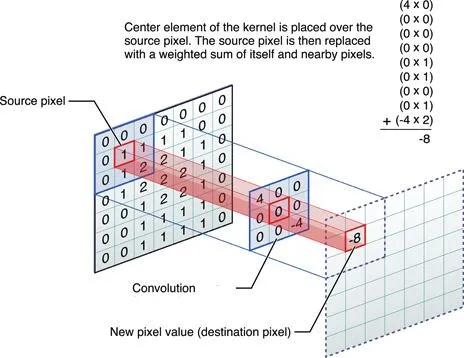

<p style="font-family:B Nazanin" dir="rtl">
    برای درک بهتر فرایند فیلتر، مثال زیر را در نظر بگیرید. فرض کنید تصویری داریم که ابعاد آن 7x7 است و فیلتر (کرنل) ما 3x3 باشد.
</p>

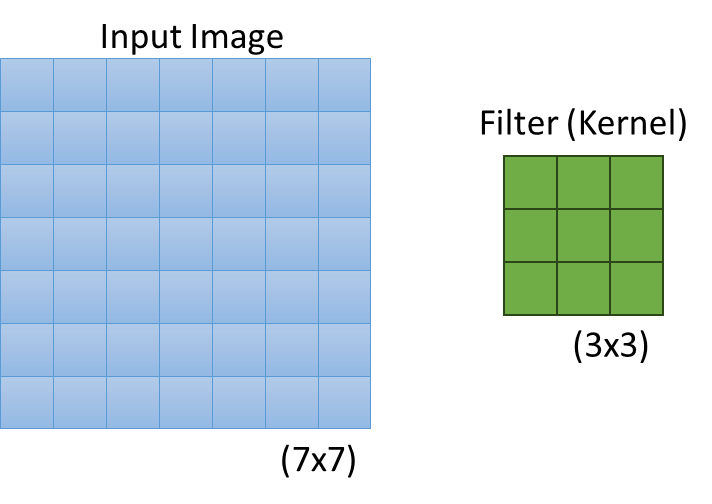

<p style="font-family:B Nazanin" dir="rtl">
    فیلتر از ابتدای تصویر شروع کرده و روی تصویر قرار می‌گیرد (مانند شکل زیر). سپس ضرب نقطه‌ای بین داده‌های ماتریس فیلتر و داده‌های بخش receptive از تصویر انجام شده و حاصل آن در پیکسل متناظر از تصویر خروجی قرار می‌گیرد. تصویر خروجی یک تصویر 5x5 خواهد بود.
</p>

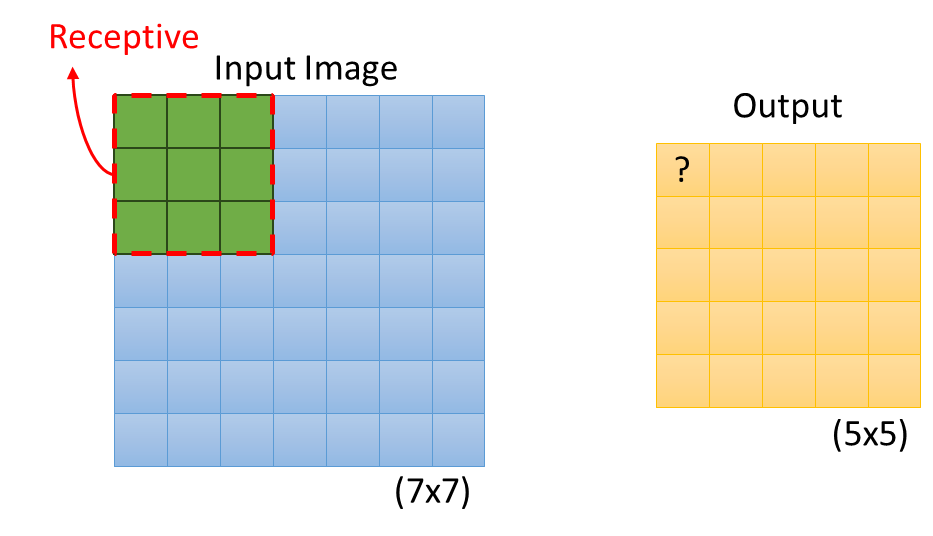

<p style="font-family:B Nazanin" dir="rtl">
    در مرحله بعد فیلتر یک واحد به سمت راست می‌رود و مجددا روی قسمت دیگری از تصویر قرار می‌گیرد. ضرب نقطه‌ای انجام می‌شود و حاصل در خروجی قرار می‌گیرد.
</p>

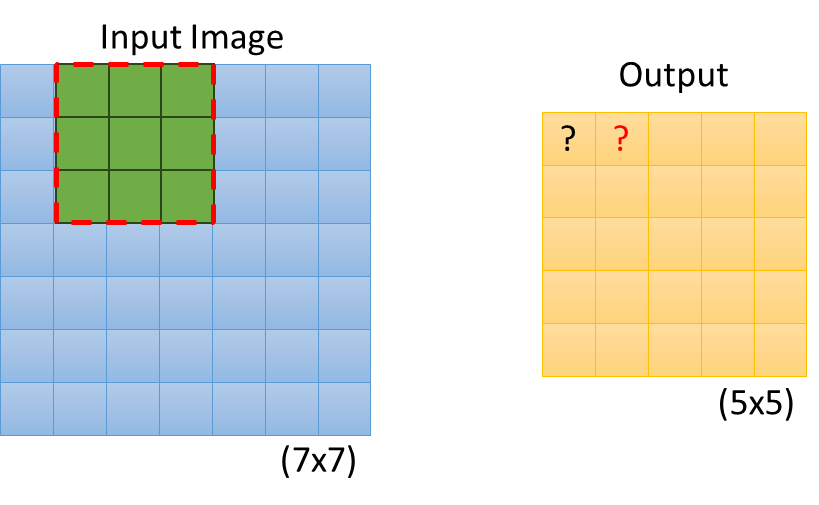

<p style="font-family:B Nazanin" dir="rtl">
    مجددا فیلتر حرکت می‌کند و به همین ترتیب تا آخر. زمانی که فیلتر به انتهای یک سطر رسید به سطر بعدی رفته و مجددا از ابتدای سطر شروع می‌کند.
</p>

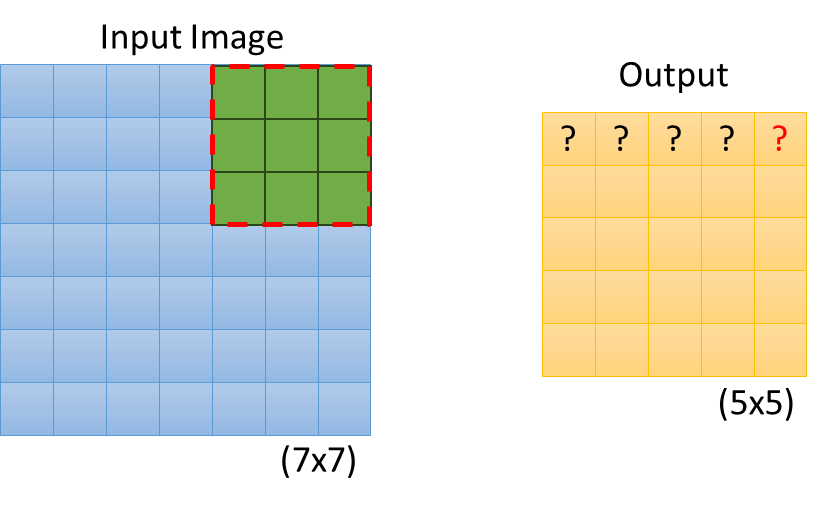

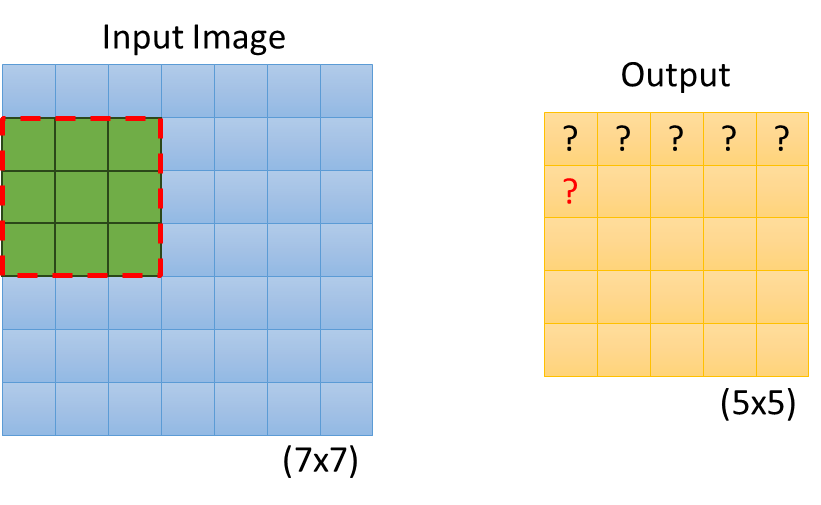

<p style="font-family:B Nazanin" dir="rtl">
    این فرایند آنقدر انجام می‌شود تا فیلتر به انتهای تصویر برسد.
</p>

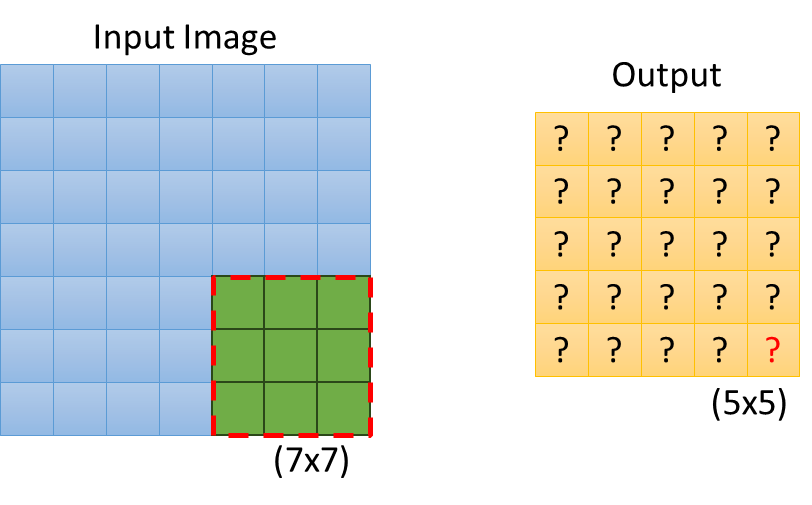

<p style="font-family:B Nazanin" dir="rtl">
    اما چرا سایز خروجی 5x5 می‌شود؟ با توجه به اینکه در هر سطر 5 خانه داریم و فیلتر نیز 3 خانه دارد، با حرکت فیلتر نهایتا می‌توانیم 5 بار در هر سطر حرکت کنیم. در ارتفاع تصویر نیز همین طور است. بنابراین ابعاد خروجی 5x5 خواهد شد. به طور فرمول محاسبه ابعاد خروجی به صورت زیر است: (در مورد پارامتر S و P در ادامه توضیح خواهیم داد)
</p>

$
W_i = Input\; Width \\
H_i = Input\; Height \\
W_f = Filter\; Width \\
H_f = Filter\; Height \\
W_o = Output\; Width \\
H_o = Output\; Height \\
S = Stride\\
P = Padding
$

$$
W_o = \frac{W_i - W_f}{S} + 1 \qquad\qquad H_O = \frac{H_i - H_f}{S} + 1
$$

<p style="font-family:B Nazanin" dir="rtl">
    پارامتر Stride معرف میزان پرش فیلتر است که معمولا یک در نظر گرفته می‌شود. یعنی در هر مرحله فیلتر یک واحد حرکت می‌کند. <br>
    همان طور که مشخص است ابعاد تصویر خروجی از تصویر ورودی کوچکتر می‌شود. اما این مسئله ایده‌آل نیست. چرا که ما می‌خواهیم که یک سری ویژگی را از تصویر خود به دست بیاوریم نه اینکه تصویر را کوچکتر کنیم. بنابراین از ویژگی Padding استفاده می‌کنیم. به این صورت که به صورت مجازی ابعاد تصویر را از هر چهار طرف بزرگ‌تر می‌کنیم و تمام خانه‌های اطراف که اضافه شده‌اند را با مقدار صفر پر می‌کنیم (چون صفر در هر عددی ضرب شود صفر است و با هر عددی جمع شود در آن تاثیری نمی‌گذارد). بنابراین در ضرب داخلی تغییری ایجاد نمی‌کند. به این صورت ابعاد تصویر نهایی با تصویر ورودی برابر خواهد شد.
</p>

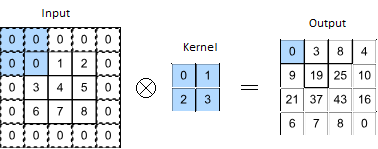

<p style="font-family:B Nazanin" dir="rtl">
    در تصاویر واقعی هر کدام از پیکسل‌های تصویر یک عدد است که میزان رنگ آن پیکسل را مشخص می‌کند و با اعمال فیلتر‌ّای مختلف می‌توان ویژگی‌های مختلفی را از آن تصویر به دست آورد. به عنوان مثال در تصویر زیر فیلتری به نام sharpen استفاده شده که باعث می‌شود بتوانیم لبه‌های تصویر را بهتر به دست آوریم.
</p>

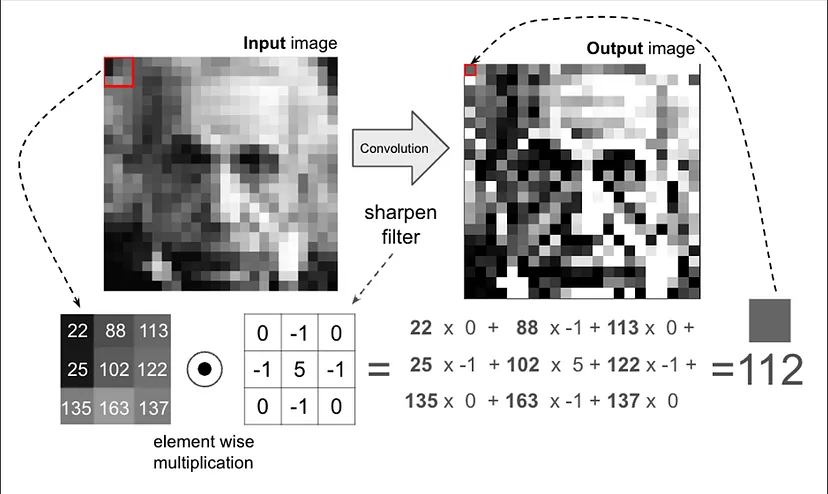

<p style="font-family:B Nazanin" dir="rtl">
    در ادامه می‌خواهیم ابتدا با استفاده از کتابخانه PyTorch فرایند کتنولوشن را پیاده‌سازی کنیم تا دقیقا با تمام مفاهیمش آشنا شویم ولی پس از آن برای استفاده از کانولوشن از کتابخانه TensorFlow استفاده می‌نماییم. <br>
    در کنار این موارد از کتابخانه cv2 که یک کتابخانه بسیار قدرتمند از مجموعه OpenCV است استفاده می‌کنیم که یک کتابخانه کاربردی برای کار کردن در حوزه بینایی ماشین است. از کتابخانه cv2 برای پردازش تصاویر استفاده می‌شود. از امکانات این کتابخانه می‌توان به این موارد اشاره کرد: خواندن و ذخیره کردن تصاویر، تغییر ابعاد تصاویر، برش تصاویر، فیلتر کردن و تبدیل رنگ تصاویر، کار کردن روی تصاویر سه‌بعدی، پردازش ویدئو و ...
</p>

<p style="font-family:B Nazanin" dir="rtl">
    در اینجا در یک مثال می‌خواهیم فرایند کانولوشن را پیاده‌سازی کنیم. در ابتدا یک تصویر را می‌خوانیم که این عملیات با کمک تابع imread از کتابخانه cv2 انجام می‌شود. این تصویر را به صورت رنگ‌های خاکستری یا مد رنگی GrayScale می‌خوانیم.
</p>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Fetch image in grayscale format
image = cv2.imread('/content/drive/MyDrive/Darsman AI Course/Deep Learning/b.jpg', cv2.IMREAD_GRAYSCALE)

<p style="font-family:B Nazanin" dir="rtl">
    با استفاده از کتابخانه matplotlib می‌توانیم این تصویر را در قالب یک نمودار نشان دهیم.
</p>

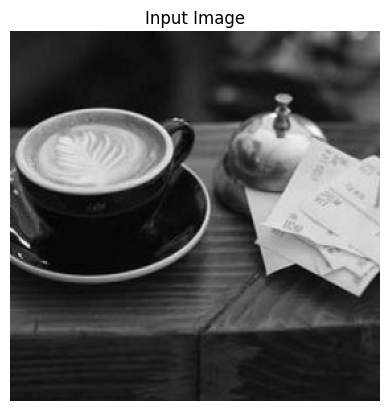

In [5]:
# Grayscale image display with Matplot library
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

In [6]:
print(image.shape)

(280, 280)


<p style="font-family:B Nazanin" dir="rtl">
    نکته مهم در هنگام استفاده از تصاویر در لایه‌های کانولوشنی این است که معمولا ما می‌خواهیم چندین تصویر را در این لایه‌ها استفاده کنیم و هر تصویر نیز بر اساس نوع مد رنگی که دارند، چند کاناله هستند. بنابراین ابعاد داده‌های ورودی این لایه‌های کانولوشنی باید به این صورت باشد: بعد اول مربوط به تعداد تصاویر، بعد دوم تعداد کانال‌های رنگی هر تصویر و ابعاد سوم و چهارم مربوط به ابعاد تصویر می‌باشد.
</p>

In [7]:
image = np.expand_dims(image, axis=0)
print(image.shape)
image = np.expand_dims(image, axis=0)
print(image.shape)

(1, 280, 280)
(1, 1, 280, 280)


In [8]:
print(image)

[[[[ 34  34  33 ... 120 123 125]
   [ 34  34  33 ... 121 124 127]
   [ 34  34  33 ... 124 128 131]
   ...
   [ 23  23  23 ...  23  23  23]
   [ 21  21  20 ...  21  21  21]
   [ 21  21  21 ...  20  21  21]]]]


<p style="font-family:B Nazanin" dir="rtl">
    برای کار با تصاویر در لایه‌های کانولوشنی باید اعداد اعشاری داشته باشیم.
</p>

In [9]:
image = torch.tensor(image, dtype=torch.float32)
print(image.shape)
print(image)

torch.Size([1, 1, 280, 280])
tensor([[[[ 34.,  34.,  33.,  ..., 120., 123., 125.],
          [ 34.,  34.,  33.,  ..., 121., 124., 127.],
          [ 34.,  34.,  33.,  ..., 124., 128., 131.],
          ...,
          [ 23.,  23.,  23.,  ...,  23.,  23.,  23.],
          [ 21.,  21.,  20.,  ...,  21.,  21.,  21.],
          [ 21.,  21.,  21.,  ...,  20.,  21.,  21.]]]])


<p style="font-family:B Nazanin" dir="rtl">
    در مرحله بعد باید فیلتر (کرنل) خود را مشخص کنیم. در طول زمان و با بررسی‌های مختلف، ماتریس‌های مختلفی به عنوان فیلتر معرفی شده‌اند که تعدادی از موارد معروف در زیر آورده شده است:
</p>

In [10]:
# Sharpen filter
sharpen_filter = torch.tensor([[[[ 0, -1,  0],
                                 [-1,  5, -1],
                                 [ 0, -1,  0]]]], dtype=torch.float32)


# Vertical edge detection filter
edge_detection_filter = torch.tensor([[[[-1, -1, -1],
                                        [0 ,  0,  0],
                                        [1 ,  1,  1]]]], dtype=torch.float32)


# Uniform Blur filter
blur_filter = torch.tensor([[[[1/9, 1/9, 1/9],
                              [1/9, 1/9, 1/9],
                              [1/9, 1/9, 1/9]]]], dtype=torch.float32)


# Feature Emboss Filter
emboss_filter = torch.tensor([[[[-2, -1, 0],
                                [-1,  1, 1],
                                [ 0,  1, 2]]]], dtype=torch.float32)


# Laplacian filter for edge detection
laplacian_filter = torch.tensor([[[[ 0, -1,  0],
                                   [-1,  4, -1],
                                   [ 0, -1,  0]]]], dtype=torch.float32)

<p style="font-family:B Nazanin" dir="rtl">
    در اینجا می‌خواهیم از فیلتر sharpen استفاده کنیم که لبه‌های تصویر را بهتر نشان می‌دهد.
</p>

In [16]:
filter=sharpen_filter

<p style="font-family:B Nazanin" dir="rtl">
    برای اعمال لایه کانولوشنی از متد conv2d کتابخانه PyTorch استفاده می‌کنیم. مقدار stride را برابر با 1 و padding را نیز 1 انتخاب می‌کنیم.
</p>

In [17]:
output_image = torch.nn.functional.conv2d(image, filter, stride=1, padding=1)
print(output_image.shape)
print(output_image)

torch.Size([1, 1, 280, 280])
tensor([[[[102.,  69.,  66.,  ..., 239., 246., 375.],
          [ 68.,  35.,  33.,  ..., 119., 121., 255.],
          [ 68.,  35.,  33.,  ..., 123., 129., 264.],
          ...,
          [ 44.,  21.,  24.,  ...,  22.,  21.,  44.],
          [ 40.,  20.,  15.,  ...,  20.,  19.,  40.],
          [ 63.,  42.,  43.,  ...,  38.,  43.,  63.]]]])


<p style="font-family:B Nazanin" dir="rtl">
    در اینجا ممکن است دو نکته مهم است. نکته اول این است که برای نشان دادن تصویر باید یک ماتریس دوبعدی داشته باشیم. پس برای نشان دادن تصویر دو بعد اول را حذف می‌کنیم.
</p>

In [18]:
# Convert output image to uint8 type
output_image = output_image[0, 0].detach().numpy()
print(output_image.shape)
print(output_image)

(280, 280)
[[102.  69.  66. ... 239. 246. 375.]
 [ 68.  35.  33. ... 119. 121. 255.]
 [ 68.  35.  33. ... 123. 129. 264.]
 ...
 [ 44.  21.  24. ...  22.  21.  44.]
 [ 40.  20.  15. ...  20.  19.  40.]
 [ 63.  42.  43. ...  38.  43.  63.]]


<p style="font-family:B Nazanin" dir="rtl">
    اما نکته دوم اینجاست که چون مد رنگی ما Grayscale است، بنابراین اعداد درون ماتریس که نشان دهنده شدت رنگ هستند، می‌توانند فقط در بازه صفر تا 255 باشند. اما در اثر اعمال فیلتر ممکن است عددی در خارج از این بازه نیز به دست آید. بنابراین بازه اعداد را به صفر تا 255 محدود می‌کنیم و اعداد بزرگتر از 255 را برابر با 255 و اعداد کوچکتر از صفر را برابر با صفر در نظر می‌گیریم.
</p>

In [19]:
# Clip the pixel values of the output image to the range [0, 255]
output_image = np.clip(output_image, 0, 255).astype(np.uint8)
print(output_image.shape)
print(output_image)

(280, 280)
[[102  69  66 ... 239 246 255]
 [ 68  35  33 ... 119 121 255]
 [ 68  35  33 ... 123 129 255]
 ...
 [ 44  21  24 ...  22  21  44]
 [ 40  20  15 ...  20  19  40]
 [ 63  42  43 ...  38  43  63]]


<p style="font-family:B Nazanin" dir="rtl">
    در نهایت می‌توانیم تصویر تولید شده را مشاهده کنیم.
</p>

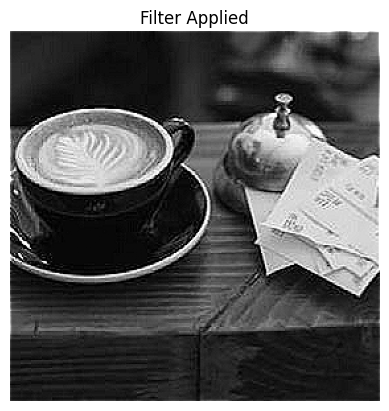

In [20]:
# Grayscale image display with Matplot library
plt.imshow(output_image, cmap='gray')
plt.title('Filter Applied')
plt.axis('off')
plt.show()

<p style="font-family:B Nazanin" dir="rtl">
    همان طور که مشاهده می‌شود تصویر تولید شده لبه‌های واضح‌تر و مشخص‌تری دارد. به همین ترتیب می‌تواند از فیلترهای مختلف استفاده کرد و ویژگی‌های متفاوتی از این تصویر به دست آورد. به عنوان مثال با استفاده از فیلتر blur که در بالا معرفی شد می‌توان تصویر را تار کرد:
</p>

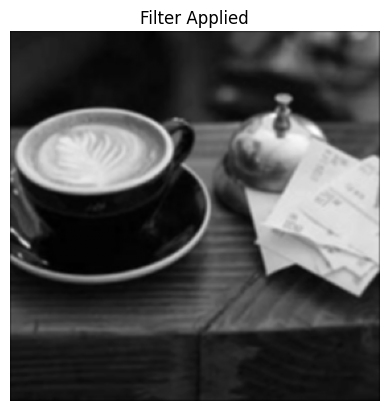

In [23]:
filter=blur_filter

output_image = torch.nn.functional.conv2d(image, filter, stride=1, padding=1)

output_image = output_image[0, 0].detach().numpy()

output_image = np.clip(output_image, 0, 255).astype(np.uint8)

plt.imshow(output_image, cmap='gray')
plt.title('Filter Applied')
plt.axis('off')
plt.show()

<p style="font-family:B Nazanin" dir="rtl">
    یا با استفاده از فیلتر laplacian می‌توان به طور کاملا مشخص لبه‌های کاملا واضح تصویر را تشخیص داد.
</p>

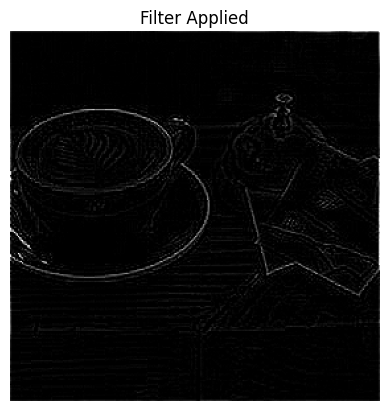

In [24]:
filter=laplacian_filter

output_image = torch.nn.functional.conv2d(image, filter, stride=1, padding=1)

output_image = output_image[0, 0].detach().numpy()

output_image = np.clip(output_image, 0, 255).astype(np.uint8)

plt.imshow(output_image, cmap='gray')
plt.title('Filter Applied')
plt.axis('off')
plt.show()

<p style="font-family:B Nazanin" dir="rtl">
    در نهایت با استفاده از تابع imwrite می‌توان تصویر تولید شده را ذخیره کرد.
</p>

In [25]:
cv2.imwrite('a_filtered.png', output_image)

True